In [6]:
import seaborn as sns

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fb = pd.read_csv('fb_stock_prices_2018.csv', index_col='date', parse_dates=True)
earthquakes = pd.read_csv('earthquakes_parsed_place.csv')
covid = pd.read_csv('covid19_cases.csv').assign(date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y'))\
.set_index('date')\
.replace('United_States_of_America', 'USA')\
.sort_index()['2020-01-18':'2020-09-18']

In [2]:
# Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami with the magType of mb

Text(0.5, 1.01, 'Correlation between magnitude and tsunami')

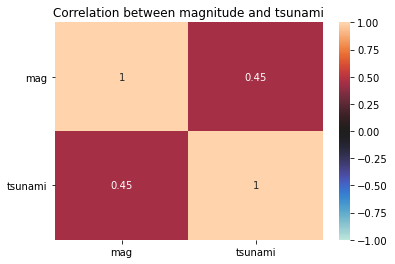

In [7]:
sns.heatmap(earthquakes.query('magType == "mb"')[['mag', 'tsunami']].corr(), annot=True, center=0, vmin=-1, vmax=1)
plt.yticks(rotation=0)
plt.title('Correlation between magnitude and tsunami', y=1.01)

In [8]:
# Create a box plot of Facebook volume traded and closing price and draw referene lines for the bounds of a Tukey fence with a multiplier of 1.5, using quantile() method on the data.
# Fill in the area between the bounds in the plot.

Text(0.5, 1.1, 'Facebook volume traded and closing price with Tukey Fence bounds')

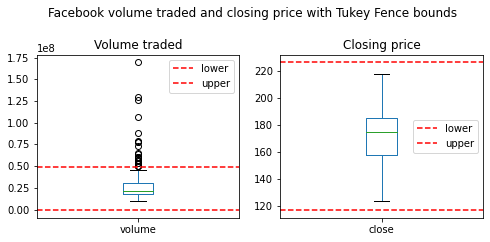

In [9]:
cols = ['volume', 'close']
subset = fb[cols]

quantiles = subset.quantile([0.25, 0.75])
quantiles.loc['iqr', :] = quantiles.loc[0.75, :] - quantiles.loc[0.25, :]

axes = subset.plot(kind='box', subplots=True, figsize=(8, 3), title=['Volume traded', 'Closing price'])

for ax, col in zip(axes, cols):
  stats = quantiles[col]
  lower = stats.loc[0.25] - 1.5 * stats['iqr']
  upper = stats.loc[0.75] + 1.5 * stats['iqr']
  for bound, name in zip([lower, upper], ['lower', 'upper']):
    ax.axhline(bound, color='red', linestyle='dashed', label=name)
    ax.legend()

plt.suptitle('Facebook volume traded and closing price with Tukey Fence bounds', y=1.1)

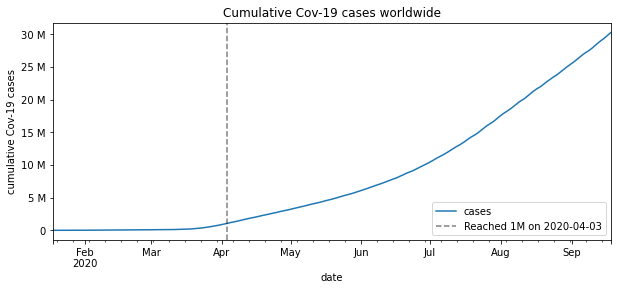

In [10]:
# Plot the evolution of cumulative COVID-19 cases worldwide and add a dashed vertical line for on the date that it surpassed 1 million

from matplotlib.ticker import EngFormatter

cumulative_cases = covid.groupby(pd.Grouper(freq='1D')).sum().cases.cumsum()

ax = cumulative_cases.plot(title='Cumulative Cov-19 cases worldwide', figsize=(10, 4))
ax.set_ylabel('cumulative Cov-19 cases')
ax.yaxis.set_major_formatter(EngFormatter())

over_1M = cumulative_cases[cumulative_cases >= 1e6].index[0]
ax.axvline(over_1M, linestyle='dashed', color='k', alpha=0.5, label=f'Reached 1M on {over_1M.strftime("%Y-%m-%d")}')

ax.legend()

In [11]:
# Use axvspan() to shade a rectangle from '2018-07-25' to '2018-07-31' marking the large decline in Facebook price on a line plot of closing price.

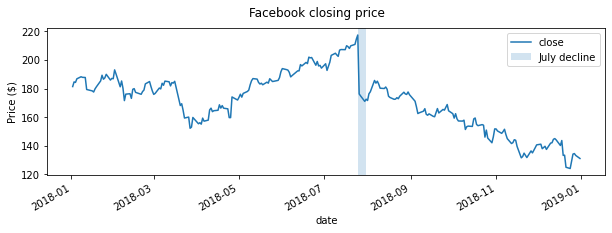

In [12]:
fb.close.plot(kind='line', figsize=(10, 3))
plt.axvspan('2018-07-25', '2018-07-31', alpha=0.2, label='July decline')
plt.ylabel('Price ($)')
plt.suptitle('Facebook closing price')
plt.legend()

In [13]:
# Using the Facebook stock data, annotate the following three events on a line graph of closing price:
# - Disappointing user growth announced after close on July 25, 2018
# - Cambridge Analytica story breaks on March 19, 2018
# - FTC launches investigation on March 20, 2018

Text(0.5, 0.98, 'Facebook closing price')

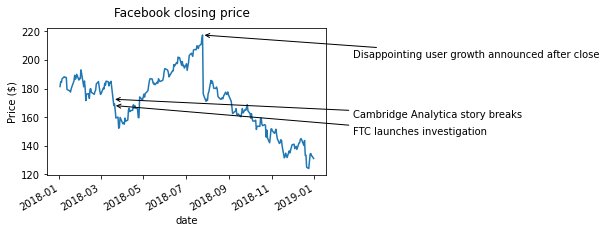

In [20]:
fb.close.plot(kind='line', figsize=(5, 3))

notes = [('Disappointing user growth announced after close', '2018-07-25'),\
    ('Cambridge Analytica story breaks', '2018-03-19'),\
    ('FTC launches investigation', '2018-03-20')
]

np.random.seed(1)

for text, date in notes:
  y_value = fb.close[date]
  jitter = np.random.uniform(-20, -10, 1)
  plt.annotate(text, xy=(date, y_value), xytext=('2019-02-25', y_value + jitter), arrowprops=dict(arrowstyle='->'))

plt.ylabel('Price ($)')
plt.suptitle('Facebook closing price')